# Introduction to Regression with Neural Network in TensorFlow
There are many definitions for a regression problem but in our case, we're going to simplify it: predicting numerical variable based on some other combination of variables, even shorted...predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


### Creating some data to view and fit

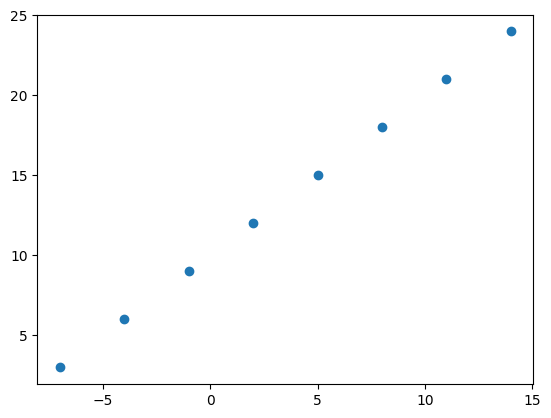

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visulize it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0],y[0]

(-7.0, 3.0)

In [10]:
# Turn our NumPy array into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

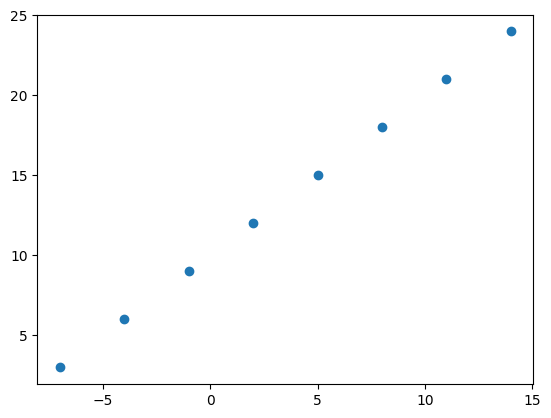

In [12]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function ( in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evalution metric (what we can use to iterpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).


In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=5) # expand X dimension by 1: from one dimension from two dimension

Epoch 1/5
1/1 [==============================] - 0s 498ms/step - loss: 19.4500 - mae: 19.4500
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 19.1688 - mae: 19.1688
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 18.8875 - mae: 18.8875
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 18.6063 - mae: 18.6063
Epoch 5/5
1/1 [==============================] - 0s 15ms/step - loss: 18.3250 - mae: 18.3250


In [14]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 90ms/step


array([[-17.195253]], dtype=float32)

In [16]:
y_pred + 16

array([[-1.1952534]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers,
increase the number of hidden units (all called neurons)
within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fittin a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).



In [17]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 319ms/step - loss: 14.7526 - mae: 14.7526
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 14.6201 - mae: 14.6201
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 14.4876 - mae: 14.4876
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 14.3551 - mae: 14.3551
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 14.2226 - mae: 14.2226
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 14.0901 - mae: 14.0901
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 13.9576 - mae: 13.9576
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 13.8251 - mae: 13.8251
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 13.6926 - mae: 13.6926
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 13.5601 - mae: 13.5601
Epoch 11/100
1/1 [==============================] 

In [18]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 64ms/step


array([[29.91821]], dtype=float32)

In [20]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 406ms/step - loss: 13.2074 - mae: 13.2074
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.1565 - mae: 13.1565
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 13.1041 - mae: 13.1041
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 13.0497 - mae: 13.0497
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 12.9932 - mae: 12.9932
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 12.9344 - mae: 12.9344
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 12.8730 - mae: 12.8730
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 12.8087 - mae: 12.8087
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 12.7413 - mae: 12.7413
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 12.6704 - mae: 12.6704
Epoch 11/100
1/1 [==============================] - 

In [21]:
model.predict([17.0])

1/1 [==============================] - 0s 109ms/step


array([[30.436016]], dtype=float32)

In [22]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"]
              )

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 664ms/step - loss: 14.3593 - mae: 14.3593
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.6496 - mae: 13.6496
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.9408 - mae: 12.9408
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.2319 - mae: 12.2319
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.5216 - mae: 11.5216
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.8083 - mae: 10.8083
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0899 - mae: 10.0899
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 9.3642 - mae: 9.3642
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 8.6288 - mae: 8.6288
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.8810 - mae: 7.8810
Epoch 11/100
1/1 [==============================] - 0s 11

In [23]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [24]:
model.predict([17.0])

1/1 [==============================] - 0s 74ms/step


array([[26.281958]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...


When it comes to evaluation... there are 3 words you should memorize:
> "Visualize, visualize, visualize:"
* The data - what data are we working with? what does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground thruth?

In [25]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [26]:
# Make a labels for the dataset
y = X +10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

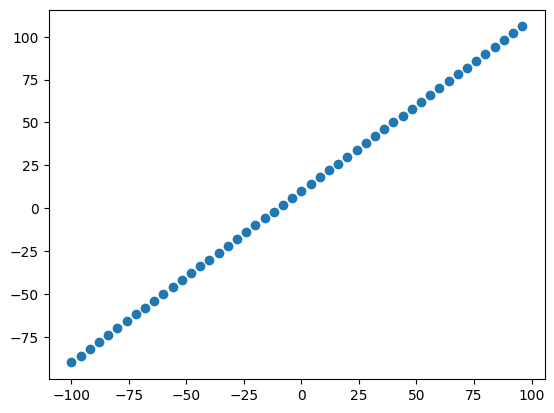

In [27]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets ...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [28]:
# Check the length of how many sample we have
len(X)

50

In [29]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets...let's visualize it again!

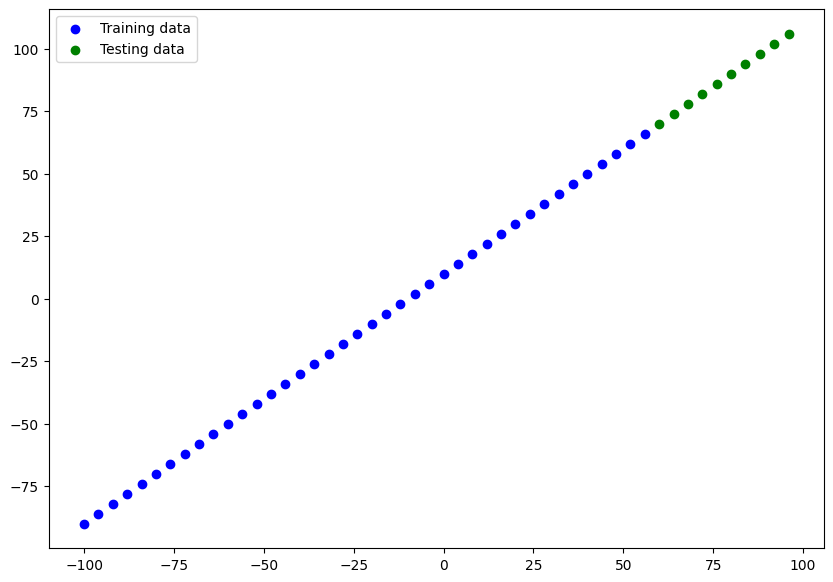

In [30]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();

In [31]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

# Vizualizing the model

In [35]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [36]:
model.build()

ValueError: You must provide an `input_shape` argument.

In [42]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1.Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])


# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

# 3.Fit the model

In [38]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params -  these parameters aren't updated during training (this is typical when you bring in already learnt patterns or parameters from another model during **transfer learning**).

** Resource: ** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to Deep learning.

** Exercice:** Try playing around with the number of hiddden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling model.summary()

In [43]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)